In [109]:
import scanpy as sc
import pandas as pd

[Executed on 2023-11-21 15:04:18.182335]


In [2]:
adata=sc.read_h5ad("/proj/sensoryaging/data/data/new_data_11.9/modified_data/modified.h5ad")
adata

[Executed on 2023-11-14 17:25:54.006720]


AnnData object with n_obs × n_vars = 23040 × 55763
    obs: 'platesID'
    layers: 'umi'

In [47]:
adata.var_names_make_unique()
adata.layers["umi"] = adata.X.copy() # save the UMI counts in a new layer
adata.obs['platesID'].value_counts()

[Executed on 2023-11-14 12:16:04.370590]


platesID
11100539    384
11177025    384
11074748    384
11100769    384
11100768    384
11176186    384
11074752    384
11170731    384
11177022    384
11075076    384
11170734    384
11100770    384
11246899    384
11176274    384
11075077    384
11177066    384
11170726    384
11177028    384
11247726    384
11177026    384
11176276    384
11263425    384
11100543    384
11176272    384
11247074    384
11247668    384
11100538    384
11100763    384
11101606    384
11101608    384
11247071    384
11176424    384
11176429    384
11263426    384
11170730    384
11100762    384
11176275    384
11100033    384
11100068    384
11247072    384
11170729    384
11100344    384
11101603    384
11177019    384
11074730    384
11280823    384
11101605    384
11170735    384
11177020    384
11170728    384
11074330    384
11263427    384
11100038    384
11177023    384
11176277    384
11177027    384
11074731    384
11100766    384
11100540    384
11247716    384
Name: count, dtype: int64

In [49]:
adata.write_h5ad("/proj/sensoryaging/data/data/new_data_11.9/modified_data/modified.h5ad")

[Executed on 2023-11-14 12:16:28.044291]


In [3]:
# Define the list of plates you want to extract
plates_to_extract = [11074731, 11176277, 11176275, 11176274, 11176272, 11176424, 11100068, 11075076, 11247726, 11247072]

# Create a boolean mask to filter cells based on plates
mask = adata.obs['platesID'].isin(plates_to_extract)

# Extract the subset of data for the specified plates
subset_adata = adata[mask]

subset_adata

[Executed on 2023-11-14 17:27:07.170549]


View of AnnData object with n_obs × n_vars = 3840 × 55763
    obs: 'platesID'
    layers: 'umi'

In [8]:
subset_adata.obs['platesID'].value_counts()

[Executed on 2023-11-14 17:27:56.042350]


platesID
11176275    384
11100068    384
11247072    384
11176277    384
11074731    384
11176424    384
11075076    384
11176274    384
11247726    384
11176272    382
Name: count, dtype: int64

In [4]:
subset_adata.var_names_make_unique()

[Executed on 2023-11-14 17:27:09.303147]


[Executed on 2023-11-14 17:27:19.534582]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

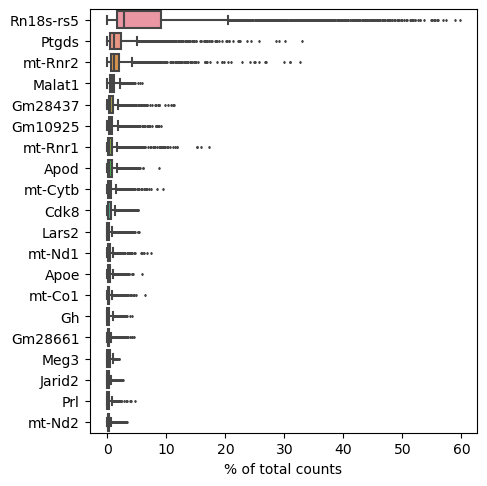

In [5]:
sc.pl.highest_expr_genes(subset_adata, n_top=20, )


In [10]:
sc.pp.filter_cells(subset_adata, min_genes=200)
sc.pp.filter_genes(subset_adata, min_cells=3)

[Executed on 2023-11-14 17:28:21.311564]


In [11]:
subset_adata.var['mt'] = subset_adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(subset_adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)

[Executed on 2023-11-14 17:28:29.652948]


[Executed on 2023-11-14 17:28:32.011343]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a 

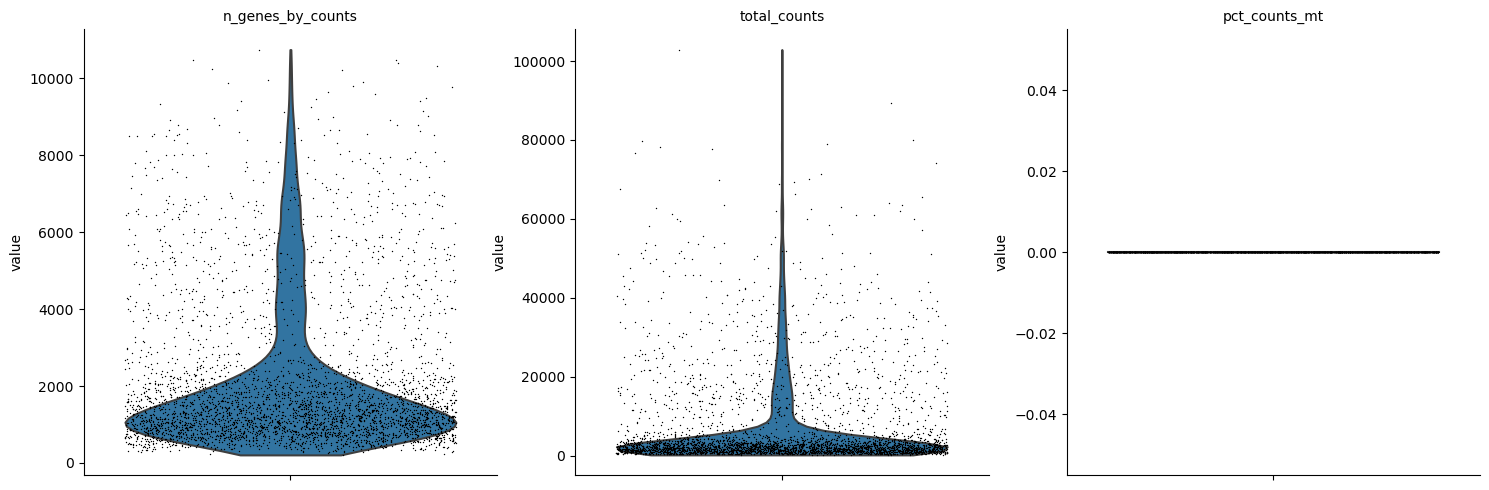

In [12]:
sc.pl.violin(subset_adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

[Executed on 2023-11-14 17:28:37.803605]


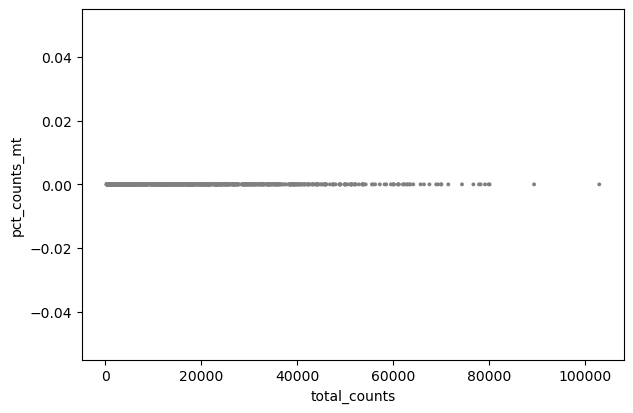

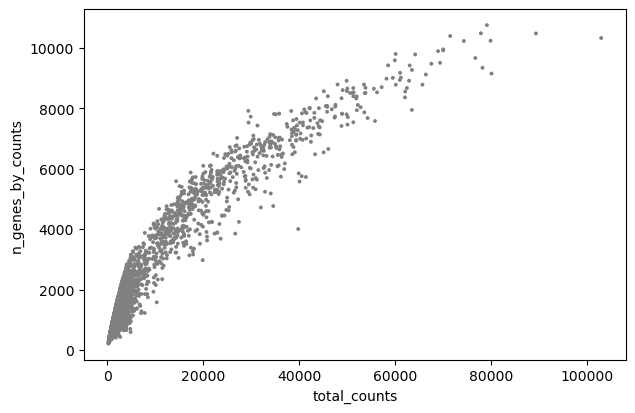

In [13]:
sc.pl.scatter(subset_adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(subset_adata, x='total_counts', y='n_genes_by_counts')

In [14]:
sc.pp.highly_variable_genes(subset_adata, n_top_genes=1000, flavor='seurat_v3',layer='umi')


[Executed on 2023-11-14 17:28:40.667793]


[Executed on 2023-11-14 17:28:47.939101]


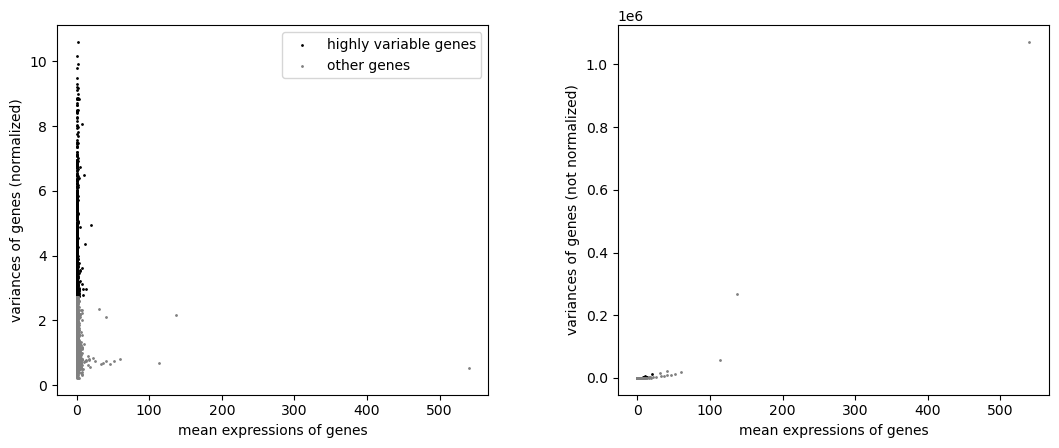

In [15]:
sc.pl.highly_variable_genes(subset_adata)

In [16]:
sc.pp.scale(subset_adata, max_value=10)


[Executed on 2023-11-14 17:28:51.108222]


In [17]:
sc.tl.pca(subset_adata, svd_solver='arpack')


[Executed on 2023-11-14 17:28:53.189551]


[Executed on 2023-11-14 17:29:00.399300]


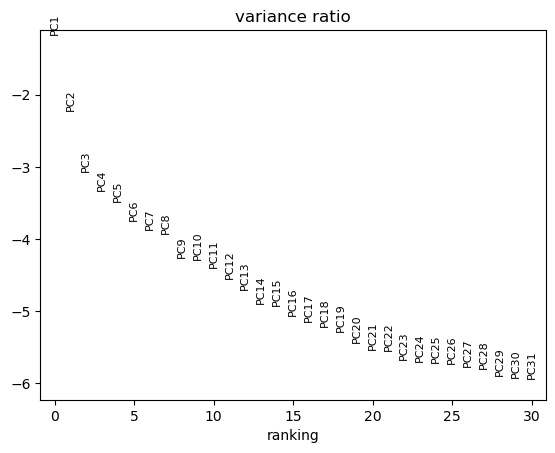

In [18]:
sc.pl.pca_variance_ratio(subset_adata, log=True)


In [19]:
sc.pp.neighbors(subset_adata, n_neighbors=30, n_pcs=10)


[Executed on 2023-11-14 17:29:01.611483]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[Executed on 2023-11-14 17:29:20.694040]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


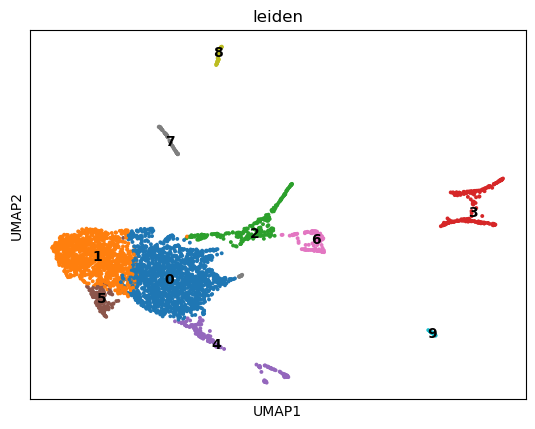

In [20]:
sc.tl.leiden(subset_adata, resolution=0.3)
sc.tl.umap(subset_adata,min_dist=0.2,spread=0.77)
sc.pl.umap(subset_adata,color='leiden',legend_loc='on data')

[Executed on 2023-11-14 17:30:10.453912]


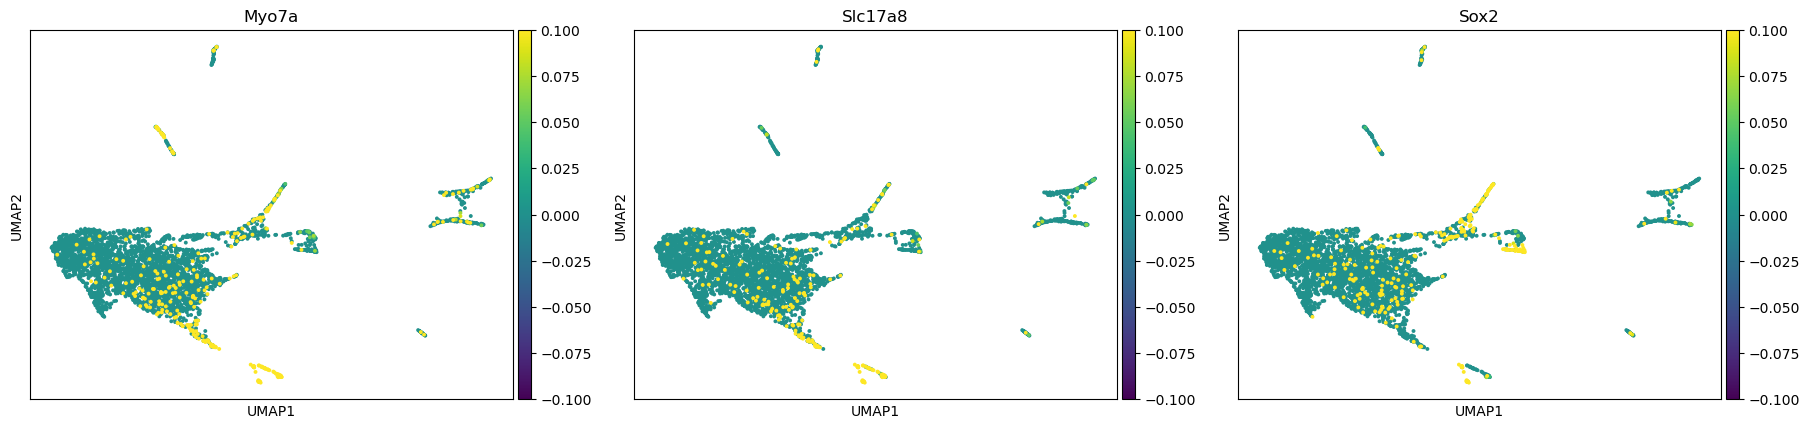

In [25]:
sc.pl.umap(subset_adata,color=['Myo7a','Slc17a8','Sox2'],layer='log1p',vmax='p90')

[Executed on 2023-11-14 17:31:46.462608]


/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:1251: FutureWarning: The default value of 'ignore' for the `na_action` parameter in pandas.Categorical.map is deprecated and will be changed to 'None' in a future version. Please set na_action to the desired value to avoid seeing this warning
  color_vector = pd.Categorical(values.map(color_map))
/proj/sensoryaging/.conda/env/Kelly/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:394: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


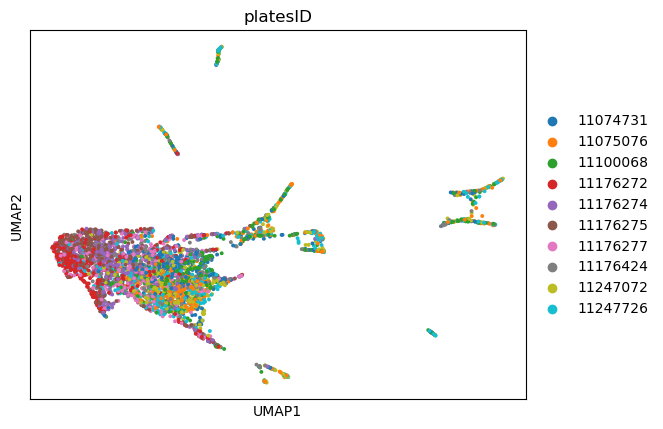

In [30]:
sc.pl.umap(subset_adata,color=['platesID'])

In [29]:
subset_adata.obs['platesID']=subset_adata.obs['platesID'].astype('category')
subset_adata.obs['platesID'].value_counts()

[Executed on 2023-11-14 17:31:43.098934]


platesID
11074731    384
11075076    384
11100068    384
11176274    384
11176275    384
11176277    384
11176424    384
11247072    384
11247726    384
11176272    382
Name: count, dtype: int64

In [81]:
subset_adata.write_h5ad("/proj/sensoryaging/data/data/new_data_11.9/modified_data/Yale_subset.h5ad")

[Executed on 2023-11-14 12:36:37.571750]


In [79]:
subset_adata

[Executed on 2023-11-14 12:36:05.313739]


AnnData object with n_obs × n_vars = 3824 × 25423
    obs: 'platesID', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm', 'mean', 'std'
    uns: 'hvg', 'pca', 'neighbors', 'leiden', 'umap', 'leiden_colors', 'log1p'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'umi', 'log1p', 'Scale'
    obsp: 'distances', 'connectivities'

In [22]:
subset_adata.X = subset_adata.layers['umi'].copy()
sc.pp.normalize_total(subset_adata, target_sum=None)
sc.pp.log1p(subset_adata)
subset_adata.layers['log1p'] = subset_adata.X.copy()
sc.pp.scale(subset_adata, max_value=10)
subset_adata.layers['Scale'] = subset_adata.X.copy()

[Executed on 2023-11-14 17:29:43.847912]
